In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode


In [71]:
df = pd.read_csv('../../data/warehouse_pull.csv')
df.head()

,year,institution_id,institution_name,state_abbr,bea_region,highest_level,is_degree_offering,is_hbcu,is_tribal_institution,geographic_status,date_closed,institutional_category,core_based_statistical_area,control_affiliation,enrollment,completions_number_students
0,2023,1,Alabama A & M University,AL,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Doctor's degree,y,y,n,City: Midsize: Territory inside an urbanized a...,NaN,"Degree-granting, primarily baccalaureate or ab...",26620,Public,6627,729
1,2023,2,University of Alabama at Birmingham,AL,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Doctor's degree,y,n,n,City: Midsize: Territory inside an urbanized a...,NaN,"Degree-granting, primarily baccalaureate or ab...",13820,Public,25357,6356
2,2023,3,Amridge University,AL,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Doctor's degree,y,n,n,City: Midsize: Territory inside an urbanized a...,NaN,"Degree-granting, primarily baccalaureate or ab...",33860,Private not-for-profit religious affiliation -...,870,171
3,2023,4,University of Alabama in Huntsville,AL,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Doctor's degree,y,n,n,City: Midsize: Territory inside an urbanized a...,NaN,"Degree-granting, primarily baccalaureate or ab...",26620,Public,10515,2288
4,2023,5,Alabama State University,AL,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Doctor's degree,y,y,n,City: Midsize: Territory inside an urbanized a...,NaN,"Degree-granting, primarily baccalaureate or ab...",33860,Public,4255,598


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year                         5687 non-null   int64 
 1   institution_id               5687 non-null   int64 
 2   institution_name             5687 non-null   object
 3   state_abbr                   5687 non-null   object
 4   bea_region                   5687 non-null   object
 5   highest_level                5687 non-null   object
 6   is_degree_offering           5687 non-null   object
 7   is_hbcu                      5687 non-null   object
 8   is_tribal_institution        5687 non-null   object
 9   geographic_status            5687 non-null   object
 10  date_closed                  18 non-null     object
 11  institutional_category       5687 non-null   object
 12  core_based_statistical_area  5687 non-null   int64 
 13  control_affiliation          5687

In [73]:
df.describe()

,year,institution_id,core_based_statistical_area,enrollment,completions_number_students
count,5687.0,5687.000000,5687.000000,5687.000000,5687.000000
mean,2023.0,2846.790047,30618.164058,4364.056445,832.308071
std,0.0,1643.928824,10935.345018,10733.123584,2043.458636
min,2023.0,1.000000,10100.000000,2.000000,0.000000
25%,2023.0,1423.500000,19780.000000,187.000000,62.000000
50%,2023.0,2846.000000,32580.000000,769.000000,207.000000
75%,2023.0,4270.500000,39660.000000,3738.000000,723.000000
max,2023.0,5702.000000,49780.000000,251081.000000,46180.000000


In [74]:
df[['institution_id', 'institution_name', 'enrollment']].sort_values(by='enrollment', ascending=False).head(10)

,institution_id,institution_name,enrollment
1726,1724,Southern New Hampshire University,251081
3951,3951,Western Governors University,236992
957,955,Ivy Tech Community College,164377
77,78,Grand Canyon University,159769
5038,5042,University of Phoenix-Arizona,144109
3121,3119,Liberty University,138745
2981,2980,Lone Star College System,103845
2932,2931,Dallas College,99774
4304,4306,American Public University System,95970
4969,4976,Arizona State University Digital Immersion,91028


In [75]:
# Utility function to display counts and percentages in tabular format
def gimme_some_counts(col):
    df_counts = pd.DataFrame(
        col.value_counts()
    )
    df_counts['pct'] = np.round(df_counts['count']/len(col), 3)
    return df_counts

,count,pct
state_abbr,,
CA,642,0.113
NY,401,0.071
TX,384,0.068
FL,324,0.057
PA,308,0.054
OH,270,0.047
IL,227,0.040
MI,152,0.027
NC,150,0.026


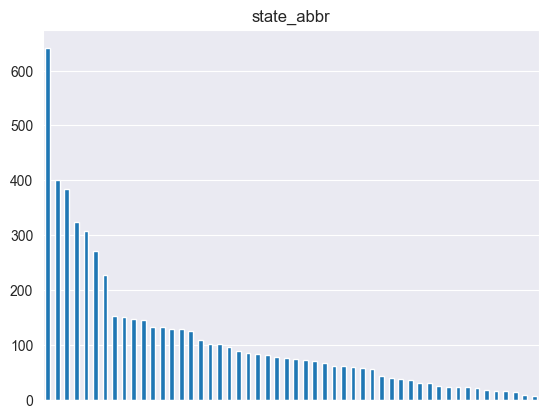

In [76]:
plt = df['state_abbr'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='state_abbr'
);
plt.get_xaxis().set_visible(False)
gimme_some_counts(df['state_abbr'])


,count,pct
bea_region,,
Southeast AL AR FL GA KY LA MS NC SC TN VA WV,1370,0.241
Mid East DE DC MD NJ NY PA,965,0.170
Far West AK CA HI NV OR WA,877,0.154
Great Lakes IL IN MI OH WI,832,0.146
Southwest AZ NM OK TX,615,0.108
Plains IA KS MN MO NE ND SD,411,0.072
New England CT ME MA NH RI VT,289,0.051
Rocky Mountains CO ID MT UT WY,196,0.034
Outlying areas AS FM GU MH MP PR PW VI,125,0.022


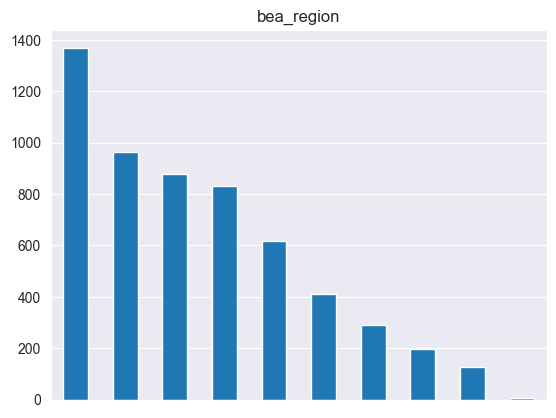

In [77]:

plt = df['bea_region'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='bea_region'
);
plt.get_xaxis().set_visible(False)
gimme_some_counts(df['bea_region'])


,count,pct
highest_level,,
"Postsecondary award, certificate or diploma of at least one but less than two academic years",1502,0.264
Doctor's degree,1209,0.213
Associate's degree,922,0.162
Bachelor's degree,642,0.113
Master's degree,635,0.112
"Postsecondary award, certificate or diploma of at least two but less than four academic years",471,0.083
"Postsecondary award, certificate or diploma of less than one academic year",147,0.026
Post-master's certificate,144,0.025
Postbaccalaureate certificate,15,0.003


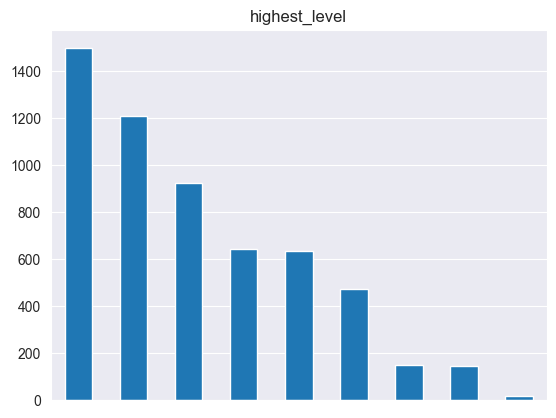

In [78]:
plt = df['highest_level'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='highest_level'
);
plt.get_xaxis().set_visible(False)
gimme_some_counts(df['highest_level'])


,count,pct
is_degree_offering,,
y,3780,0.665
n,1907,0.335


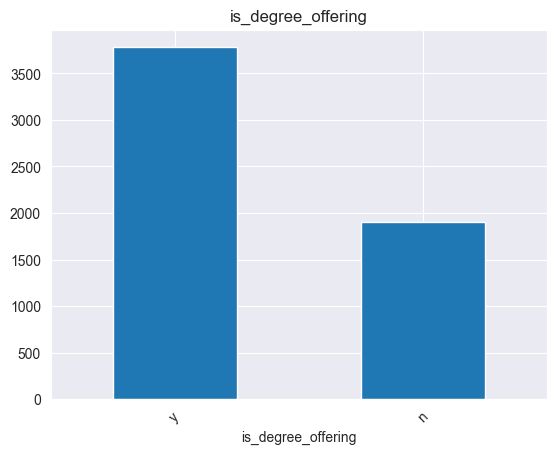

In [79]:
df['is_degree_offering'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='is_degree_offering'
);
gimme_some_counts(df['is_degree_offering'])


,count,pct
is_hbcu,,
n,5591,0.983
y,96,0.017


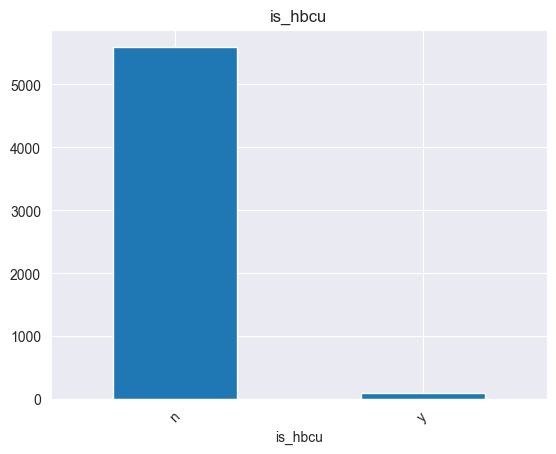

In [80]:
df['is_hbcu'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='is_hbcu'
);
gimme_some_counts(df['is_hbcu'])


,count,pct
is_tribal_institution,,
n,5673,0.998
y,14,0.002


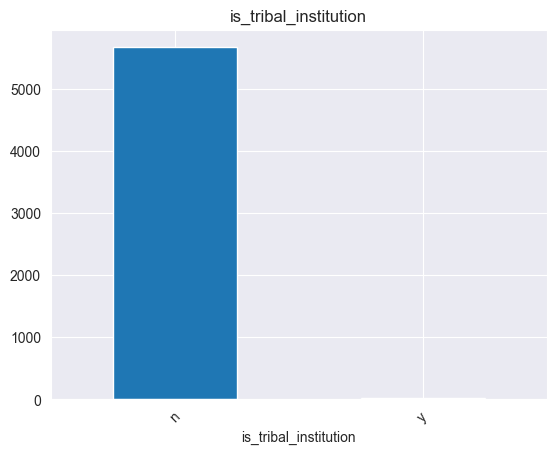

In [81]:
df['is_tribal_institution'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='is_tribal_institution'
);
gimme_some_counts(df['is_tribal_institution'])


,count,pct
geographic_status,,
"Suburb: Large: Territory outside a principal city and inside an urbanized area with population of 250,000 or more.",1459,0.257
"City: Large: Territory inside an urbanized area and inside a principal city with population of 250,000 or more.",1402,0.247
"City: Small: Territory inside an urbanized area and inside a principal city with population less than 100,000.",784,0.138
"City: Midsize: Territory inside an urbanized area and inside a principal city with population less than 250,000 and greater than or equal to 100,000.",715,0.126
Town: Distant: Territory inside an urban cluster that is more than 10 miles and less than or equal to 35 miles from an urbanized area.,349,0.061
"Rural: Fringe: Census-defined rural territory that is less than or equal to 5 miles from an urbanized area, as well as rural territory that is less than or equal to 2.5 miles from an urban cluster.",275,0.048
Town: Remote: Territory inside an urban cluster that is more than 35 miles of an urbanized area.,213,0.037
"Suburb: Midsize: Territory outside a principal city and inside an urbanized area with population less than 250,000 and greater than or equal to 100,000.",163,0.029
Town: Fringe: Territory inside an urban cluster that is less than or equal to 10 miles from an urbanized area.,106,0.019


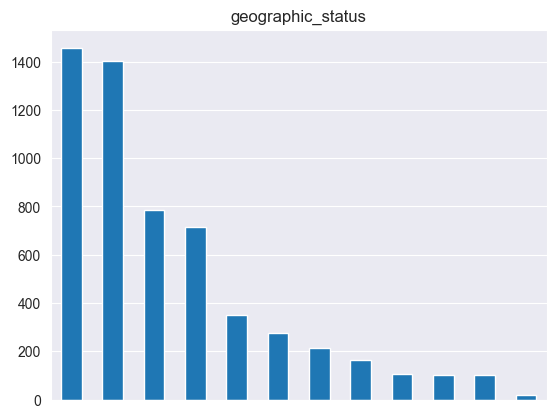

In [82]:
plt = df['geographic_status'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='geographic_status'
);
plt.get_xaxis().set_visible(False)
gimme_some_counts(df['geographic_status'])


,count,pct
institutional_category,,
"Degree-granting, primarily baccalaureate or above - These institutions offer a Bachelor's degree, Master's degree,Doctor's degree or a First-professional degree. Also, the total number of degrees/certificates at or above the bachelor's level awarded divided by the total number of degrees/certificates awarded is greater than 50 percent.",1932,0.340
"Nondegree-granting, sub-baccalaureate - Institutions do not offer Associate's, Bachelor's , Master's, Doctor's, or First-professional degrees, or certificates above the baccalaureate level. They do offer postsecondary certificates, awards or diplomas of less than one academic year; at least one but less than two academic years; or at least two but less than four academic years.",1902,0.334
"Degree-granting, Associate's and certificates - Institutions offer an Associate's degree and may offer other postsecondary certificates, awards or diplomas of less than one academic year; at least one but less-than two academic years; at least two but less-than four academic years. This category also includes institutions that offer a postbaccalaureate certificate, Post-master's certificate or a First-professional certificate and the highest degree offered is an Associate's degree.",1142,0.201
"Degree-granting, not primarily baccalaureate or above - These institutions offer a Bachelor's degree, Master's degree, Doctor's degree,or a First-professional degree. Also, the total number of degrees/certificates at or above the bachelor's level awarded divided by the total number of degrees/certificates awarded must be less than or equal to 50 percent.",424,0.075
"Degree-granting, graduate with no undergraduate degrees - These institutions offer a Master's degree, Doctor's degree or a First-professional degree and do not offer a Bachelor's degree or an Associate's degree.",282,0.050
"Nondegree-granting, above the baccalaureate - Institutions do not offer Associate's, Bachelor's, Master's, Doctor's or First-professional degrees, but offer either Postbaccaulaureate, Post-master's or First-professional certificates.",5,0.001


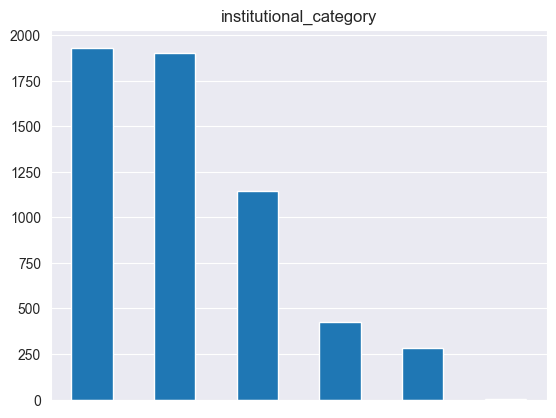

In [83]:
plt = df['institutional_category'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='institutional_category'
);
plt.get_xaxis().set_visible(False)
gimme_some_counts(df['institutional_category'])


,count,pct
control_affiliation,,
Private for-profit,2220,0.390
Public,1725,0.303
Private not-for-profit independent (no religious affiliation),895,0.157
Private not-for-profit religious affiliation - Specify,847,0.149


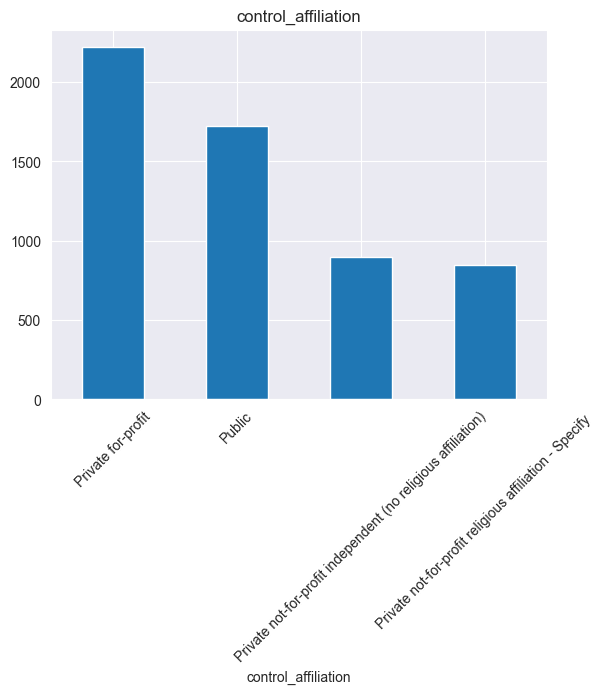

In [84]:
df['control_affiliation'].value_counts().plot(
    kind='bar'
    , rot=45
    , title='control_affiliation'
);
gimme_some_counts(df['control_affiliation'])


In [85]:
def gimme_some_averages(col, colname):
    print(f'Mean of {colname}: {np.mean(col):.2f}')
    print(f'Median of {colname}: {np.median(col)}')
    print(f'Mode of {colname}: {mode(col)}')
    print()

Mean of enrollment: 4364.06
Median of enrollment: 769.0
Mode of enrollment: ModeResult(mode=np.int64(46), count=np.int64(20))



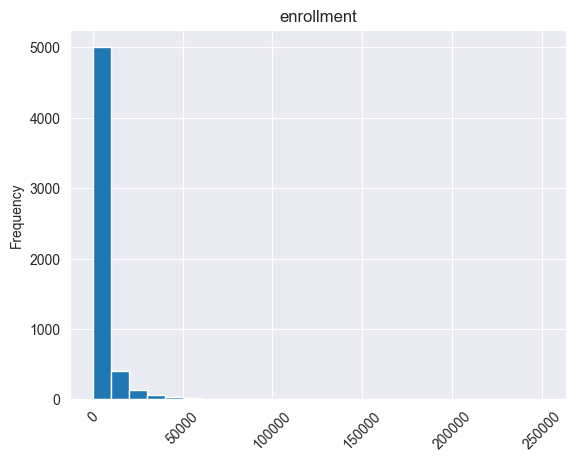

In [86]:

df['enrollment'].plot(
    kind='hist'
    , bins=25
    , title='enrollment'
    , rot=45
    , xlabel=None
);
gimme_some_averages(df['enrollment'], 'enrollment')


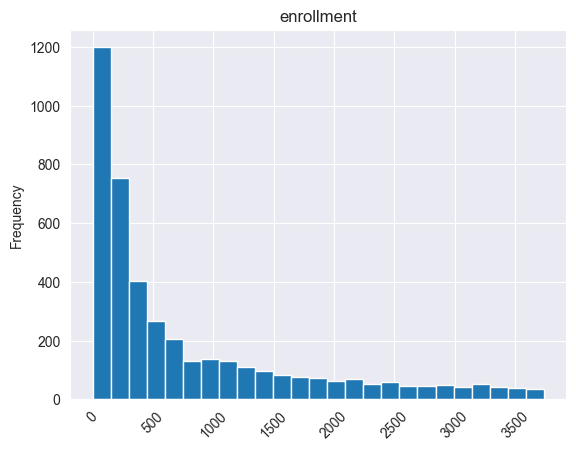

In [87]:

df[df['enrollment'] <= 3738.0]['enrollment'].plot(
    kind='hist'
    , bins=25
    , title='enrollment'
    , rot=45
    , xlabel=None
);


Mean of completions_number_students: 832.31
Median of completions_number_students: 207.0
Mode of completions_number_students: ModeResult(mode=np.int64(0), count=np.int64(46))



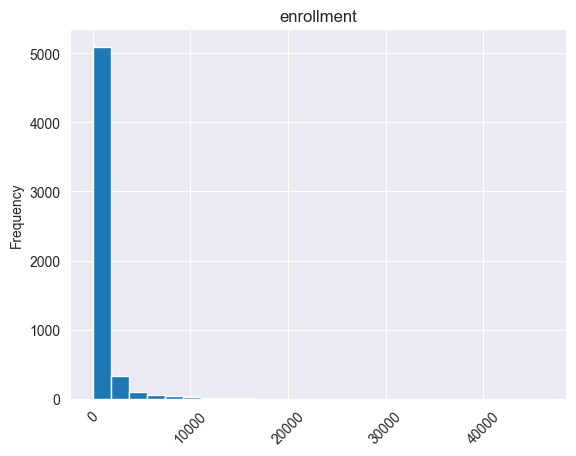

In [88]:
df['completions_number_students'].plot(
    kind='hist'
    , bins=25
    , title='enrollment'
    , rot=45
    , xlabel=None
);
gimme_some_averages(df['completions_number_students'], 'completions_number_students')


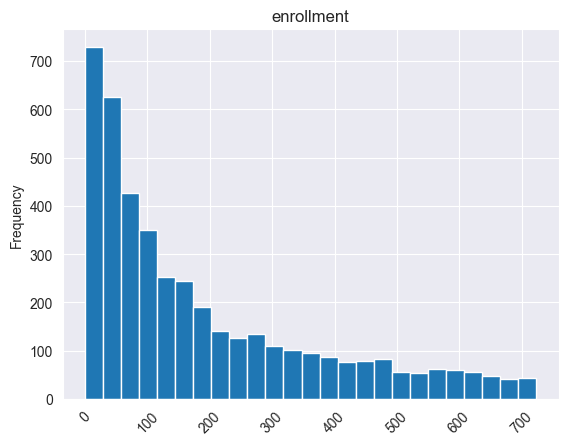

In [89]:
df[df['completions_number_students'] <= 723.0]['completions_number_students'].plot(
   kind='hist'
    , bins=25
    , title='enrollment'
    , rot=45
    , xlabel=None
);
